UM MSBA - BGEN632 

### A Brief Stats Explainer

Notebook created by Olivia B. Newton to supplement Week 9 course materials. This notebook uses the ozone dataset to demonstrate some tasks required for the independent lab assignment. The content in this notebook is based on questions asked by students in Spring 2025 term.

#### Notebook Setup

In [2]:
# load modules
import os
import pandas as pd
import statsmodels.formula.api as smf # ols regression

In [3]:
# set working directory
os.chdir("/Users/obn/Documents/GitHub/UM-BGEN632/week9labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'/Users/obn/Documents/GitHub/UM-BGEN632/week9labs/data'

In [4]:
# load ozone data
ozone_df = pd.read_table("ozone.data.txt")

#### Questions and Responses

**Q1: What does "using `intent1_01` as the target variable" mean? Should `intent1_01` be placed on the y-axis on a scatterplot?**

**A1:** Yes. In this assignment, `intent1_01` is your target, or *response*, variable. That means that you are investigating what other variables are associated with differences in `intent1_01` variable. 

* Explanatory variable may also be called a predictor or independent variable.
* Response variable may also be called a target or dependent variable.

In general, we place the explanatory variable on the x-axis and the response variable on the y-axis. As an example, we can consider ice cream sales. If we were interested in predicting ice cream sales, our response variable might be the number of ice cream cones sold on a given day. We would then consider the factors that might drive ice cream sales, like temperature. To visualize this relationship, we can place temperature on the x-axis and ice cream sales on the y-axis. We might then observe a positive association between these two variables: ice cream sales increase as temperature increases. To test whether this association is statistically significant, we can build a simple regression model: `sales ~ temperature`.

In the tutorial, we built a model where ozone was the response variable and radiation, wind, and temperature were the selected explanatory variables: `ozone ~ radiation + wind + temperature`. In other words, we expect that radiation, wind, and temperature will predict ozone values. We would want to begin our analysis by plotting the relationship between explanatory-response variable pairs:

* ozone ~ radiation
* ozone ~ wind
* ozone ~ temperature

The code below demonstrates the creation of a scatterplot for the first pair:

<Axes: xlabel='rad', ylabel='ozone'>

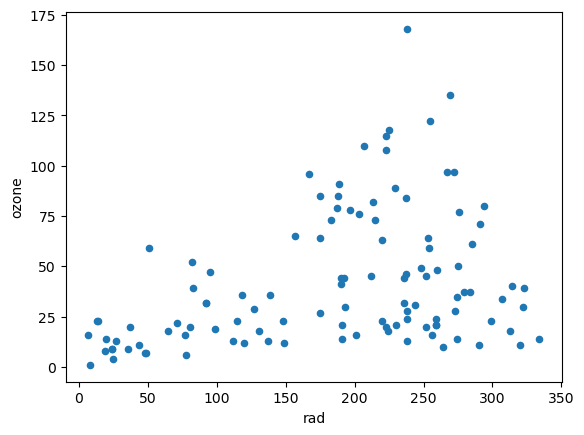

In [6]:
ozone_df.plot.scatter(x='rad', y='ozone')

**Q2: What is an *F*-test? What is a *t*-test?**

**A2:** There is a reference to these tests in the Regression in Python section, but the tests are not explained in detail:

> The *F*-statistic with its accompanying *p*-value is found on the right-hand side of the output. The *t*-tests are located toward the bottom along with the *p*-values and estimates, or coefficients. The output also contains the R-Squared ($R^2$) and the (more important) Adjusted $R^2$. Lastly, a bonus is the AIC and BIC fit indices. These fit indices are meaningful when compared to the fit indices of other models (i.e., when you are trying to select the best model from a set).

In the MSBA program, students should take the applied statistics course before this Python course, so it is generally assumed that students come in with some foundational knowledge of statistics. This foundation, paired with our focus on Python, is the reason that we do not go into depth on these topics. I will give a brief explanation here with the caveat that I am collapsing a lot of information for the sake of simplicity. 

The *F*-statistic is a value we rely on to determine if our model is statistically significant. It helps us determine how well the regression line obtained fits the given data points.

<div><center>
  <img src="https://vitalflux.com/wp-content/uploads/2022/02/simple-linear-regression-line.jpg" width=500>
</center></div>

The *F*-test will tell us if a group of variables are jointly significant. The model summary output will include the *F*-statistic and it's corresponding *p*-value. 

* *F* value = variance of the group means (Mean Square Between) / mean of the within group variances (Mean Squared Error)
  * You get this test statistic when you run a regression analysis.
* The *F* value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the *F*-test compares your model with zero predictor variables (the intercept-only model), and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model's fit.

In terms of getting the statistics for the *F*-test and *t*-test statistics in the independent lab, you can use the .summary() function with the model that you construct. I'll use the `lin_reg_2 model` we created in the tutorial to demonstrate how to do this. 

In [8]:
# create model
lin_reg_2 = smf.ols('ozone ~ rad + wind + temp', ozone_df).fit()

# get model summary output
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.91
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.45e-21
Time:                        15:08:48   Log-Likelihood:                -494.31
No. Observations:                 111   AIC:                             996.6
Df Residuals:                     107   BIC:                             1007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.2321     23.042     -2.788      0.006    -109.910     -18.554
rad            0.0598      0.023      2.580      0.011       0.014       0.106
wind          -3.3376      0.654     -5.105      0.000      -4.634      -2.041
temp           1.6512      0.253      6.516      0.000       1.149       2.154
==============================================================================
Omnibus:                       38.276   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.526
Skew:                           1.360   Prob(JB):                     4.42e-19
Kurtosis:                       6.297   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

When you run the code above you will see that the *F*-statistic value is `54.91` and it's *p*-value is `1.45e-21`. 

The *F*-statistic gives us an idea of how much variation in the response variable (ozone) is explained by the model (radiation + wind + temperature). If the *F*-statistic were zero, that would suggest that the model does not explain variation in the response variable. 

The *p*-value is provided in scientific notation which we can easily convert to a more human interpretable format (i.e., a real number) with [an online tool](https://www.calculatorsoup.com/calculators/math/scientific-notation-converter.php). The *p*-value is 0.00000000000000000000145. It's a very small number; scientific notation provides a concise representation. An aside, when reporting a *p*-value of 0.00000000000000000000145, we would format like so:

* *p* < .0001 (preferred)
<br>*OR*
* *p* = .00000000000000000000145 (not preferred, but transparent)

Note that the zero before the decimal is not included when we report *p*-values in the social and organizational sciences! 

The *p*-value is significant (*p < .05 is a commonly adopted threshold for significance*) which means that the overall model (radiation + wind + temperature) is statistically significant. We can report the *F*-statistic and *p*-value together like so, where the values in the parentheses next to the letter F are the degrees of freedom (df) which are also provided in the model summary output:

* *F*(3, 107) = 54.91 (*p* < .0001)

While the *F*-test is providing information about the overall model, the *t*-test and its statistic tells us about the statistical significance of individual terms in the model. That is why there is a *t*-statistic and corresponding *p*-value for each model term (radiation, wind, temperature) provided in the model summary output (see the columns with the lower case t and P>|t| headers). I've pasted in the values below for clarity.

* Radiation: *t* = 2.58 (*p* = .011)
* Wind: *t* = -5.11 (*p* < .0001)
* Temperature: *t* = 6.52 (*p* < .0001)

Each model term has a significant *p*-value (*p* < .05): each explanatory variable in the model is statistically significant. The size of the absolute value of *t*-statistic informs our assessment of the likelihood that the coefficient has predictive power, where a larger value indicates higher reliability of predictive power. 
 
**Q3: How can the equation of the model be constructed? How is it interpreted?**

**A3:** We can construct the model equation by using the coefficients provided in the model summary output. I'll again use the `lin_reg_2` model from the tutorial to demonstrate how to do this. Based on the coefficient values (see `coef` column) in the model summary output, we can construct the regression equation as follows:

> ozone = -64.23 + 0.06 radiation - 3.34 wind + 1.65 temperature

Note that I have rounded the coefficients to the nearest hundredths place. A simple interpretation of the equation:

1. If radiation increases by 1, ozone will increase by 0.06.
1. If wind increases by 1, ozone will decrease by 3.34.
1. If temperature increases by 1, ozone will increase by 1.65